# US Accidents Exploratory Data Analysis

TODO - talk about the EDA 
TODO - talk about the dataset(source,what it contains, how it will be useful)
- Kaggle
- Information about accidents
- Can be useful too prevent accidents
- Mention that this data does not contain data about New York

In [1]:
#install Kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahilmazumder","key":"55da33a4fbd1660090be001889abc572"}'}

In [4]:
#create a Kaggle folder
! mkdir ~/.kaggle

In [5]:
#copy the kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

In [6]:
#Permission for the json to act
! chmod 600~/.kaggle/kaggle.json

chmod: missing operand after ‘600~/.kaggle/kaggle.json’
Try 'chmod --help' for more information.


In [8]:
#to list all datasets in kaggle -quiet
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-13 06:53:06          10635  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6503  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2450  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2647  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [58]:
data_filename='/content/us-accidents/US_Accidents_Dec20_Updated.csv'

## Download the Data

1. Load the file using pandas
2. Look at some information about the data and the columns
3. Fix any missing or incorrect values

In [9]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 96% 278M/290M [00:03<00:00, 75.5MB/s]
100% 290M/290M [00:03<00:00, 90.2MB/s]


In [10]:
!unzip us-accidents.zip


Archive:  us-accidents.zip
  inflating: US_Accidents_Dec20_Updated.csv  


# Data Preparation & Cleaning

1. Load the file using pandas
2. Look at some information about the data and columns
3. Fix any missing and incorrect values

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv(data_filename)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [15]:
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [17]:
missing_percentages=df.isna().sum().sort_values(ascending=False)/ len(df)
missing_percentages

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

In [18]:
missing_percentages!= 0

Number                    True
Precipitation(in)         True
Wind_Chill(F)             True
Wind_Speed(mph)           True
End_Lat                   True
End_Lng                   True
Visibility(mi)            True
Weather_Condition         True
Humidity(%)               True
Temperature(F)            True
Wind_Direction            True
Pressure(in)              True
Weather_Timestamp         True
Airport_Code              True
Timezone                  True
Zipcode                   True
Nautical_Twilight         True
Astronomical_Twilight     True
Civil_Twilight            True
Sunrise_Sunset            True
City                      True
Amenity                  False
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
Distance(mi)             False
Description              False
Turning_Loop             False
Street                   False
Side                     False
County  

In [19]:
type(missing_percentages)

pandas.core.series.Series

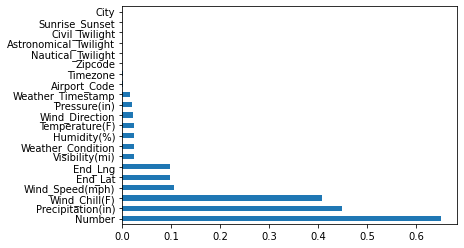

In [20]:
missing_percentages[missing_percentages!= 0].plot(kind='barh')

 Remove columns that you don't want to use.

## Exploratory Analysis & Visualisation

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [21]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [22]:
df.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [23]:
cities = df.City.unique()
len(cities)

11790

In [24]:
Cities_by_accidents=df.City.value_counts()
Cities_by_accidents

Los Angeles       68411
Houston           68265
Charlotte         56176
Miami             49965
Dallas            48525
                  ...  
Lipan                 1
Saint Georges         1
Mont Vernon           1
La Luz                1
Brownstown Twp        1
Name: City, Length: 11789, dtype: int64

In [28]:
Cities_by_accidents[ :20 ]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [41]:
type(Cities_by_accidents)

pandas.core.series.Series

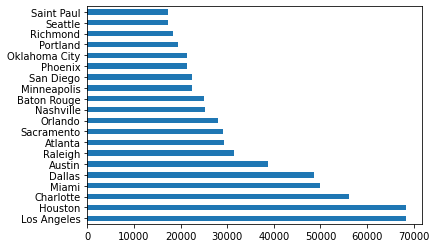

In [39]:
Cities_by_accidents[:20].plot( kind = 'barh')

In [42]:
import seaborn as sns
sns.set_style("darkgrid")

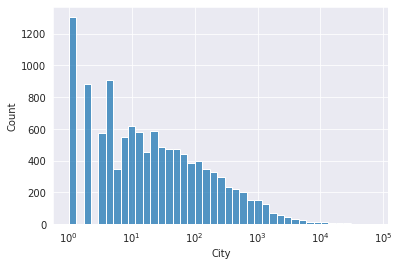

In [52]:
sns.histplot(Cities_by_accidents, log_scale= True)

In [57]:
Cities_by_accidents[Cities_by_accidents == 1]

Mulga                    1
Houghton Lake Heights    1
West Columbia-Cayce      1
Carrabassett Valley      1
Summitville              1
                        ..
Lipan                    1
Saint Georges            1
Mont Vernon              1
La Luz                   1
Brownstown Twp           1
Name: City, Length: 1306, dtype: int64

### Start Time

In [59]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [62]:
df.Start_Time= pd.to_datetime(df.Start_Time)

In [65]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [46]:
high_accident_cities = Cities_by_accidents[Cities_by_accidents >= 1000]
low_accident_cities = Cities_by_accidents[Cities_by_accidents < 1000]

In [47]:
len(high_accident_cities)

513

In [49]:
len(high_accident_cities)/len(cities)

0.04351145038167939

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


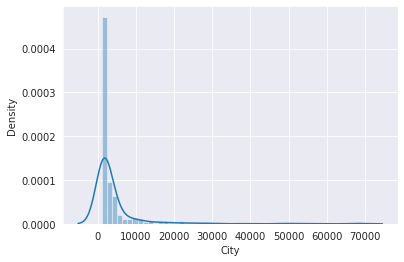

In [50]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


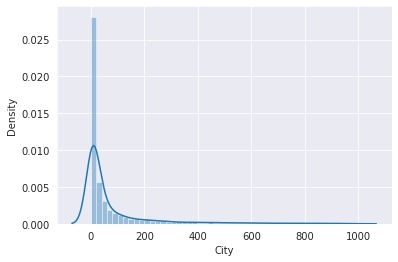

In [51]:
sns.distplot(low_accident_cities)

In [36]:
"NY" in df.State

False

## Ask & Answer Questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest no. of accidents? How about per capita ?
3. Does New York show up in the data? If yes, why is the count lower if this is the most populated city?
4. Among the top 100 cities in no. of accidents, which state do they belong to most frequently ?
5. What time of the day are the accidents most frequent in ?
6. Which days of the week have the most accidents ?
7. Which months have the most accidents?
8. What is the trend of accidents year over year? (decreasing/increasing)

# Summary & Conclusion 

Insights:
- No data for New York
- The no. of accidents per city decreases exponentially
- Less than 5% cities have more than 1000 accidents yearly
- Over 1300 cities have reported just 1 accident(need to investigate)